<a href="https://colab.research.google.com/github/kamalova/Capstone/blob/main/dataload_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)
import string
string.punctuation
import re
from sklearn.feature_extraction.text import TfidfVectorizer


# Data visualization
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
# Seaborn's beautiful styling
import seaborn as sns
sns.set_style('whitegrid')

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import TweetTokenizer
from wordcloud import WordCloud

In [ ]:
%rm -rf sample_data/

In [ ]:

reviews_march = pd.read_csv('/content/reviews_march.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False, nrows=20000);
reviews_jun = pd.read_csv('/content/reviews_jun.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False, nrows=20000);
reviews_sep = pd.read_csv('/content/reviews_sep.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False, nrows=20000);
reviews_dec = pd.read_csv('/content/reviews_dec21.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False, nrows=20000);

In [ ]:
print(reviews_march.shape, reviews_jun.shape, reviews_sep.shape, reviews_dec.shape)
      

(20000, 6) (20000, 6) (20000, 6) (20000, 6)


In [ ]:
df_reviews = pd.concat([reviews_march,reviews_jun, reviews_sep,reviews_dec])

In [ ]:
df_reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2595,17857,2009-11-21,50679,Jean,"Notre séjour de trois nuits.\r<br/>Nous avons apprécier L'appartement qui est très bien situé. Agréable, propre et bien soigné. C'est idéal pour une famille de 3 ou 4 personnes.\r<br/>Petits soucis en arrivant il y avait personne pour nous recevoir, et il manquait le savon pour la douche, le liquide vaisselle, nous les avons reçu de surlendemain. Il y a aussi le bruit du Métro de NY, donc une première nuit difficile si on est pas habitué. Jennifer est correcte le remboursement de la caution était très rapide. A part ces petits détails notre court séjour c'est bien passé. \r<br/>Si j'ai la possibilité de revenir sur NY pour les vacances, je reprendrai à ""The Midtown Castle""\r<br/>Jean\r<br/>Possession - Ile de La Réunion\r<br/>"
1,2595,19176,2009-12-05,53267,Cate,Great experience.
2,2595,19760,2009-12-10,38960,Anita,"I've stayed with my friend at the Midtown Castle for six days and it was a lovely place to be. A big spacious room with a pointy roof, which really makes you feel like staying in a castle. The location is perfect. It is just a few steps from Macy's Time Square and Theatre District. Everything worked just perfect with the keys etc. Thank you so much Jennifer, we had a great time in New York.\r<br/>Attention: it's on the 4th floor without a lift :-) but definetely worth it!"
3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, enjoying to be in the center of the city, that never sleeps...short ways to everywhere in Manhattan, by subway or by walk. Midtown castle is a beauftiful and tastful place, Jennifer and Tori relaxed and friendly hosts - thats why we - the three Berliners - recommand that place! Good to have WiFi and a little kitchen too!"
4,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming apartment! They were very organized and helpful; I would definitely recommend staying at the Midtown Castle!
...,...,...,...,...,...,...
19995,72265,161050979,2017-06-16,109542482,John,Vanessa was very pleasant and communication was very good.
19996,72265,163401732,2017-06-24,1282541,Sofia,Great location! Close to G train.
19997,72265,252657179,2018-04-11,8936723,Yo,"Highly recommend. Cannot beat this value. <br/><br/>Great location - 4 minute walk to subway and 20 sec to bus which connects you easily and quickly to various parts of Manhattan and Brooklyn. Organic (as well as regular) grocery stores and lots of awesome restaurants and stores near by. Very safe neighborhoods <br/>Nice room - not big but it's plenty enough and everything works well. It's nice & warm in the winter. Even though the bedroom is separated by a curtain to the kitchen, because the host is mainly in the other section of the apartment, you have a lot of privacy. <br/>Vanessa is a very friendly, interesting and helpful host."
19998,72265,277084426,2018-06-15,17160406,Ioannis,"Vanessa is a great and very polite host and gives you as much privacy as you want. The room can be seen in the photos and has everything you need. The location is amazing as well with plenty of bars, restaurants and stores around and literally half a block away from G train."


In [ ]:
df_reviews = df_reviews.drop(columns=['id','reviewer_name'])

In [ ]:
list_dec = pd.read_csv('/content/listings_dec21.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False);
list_march = pd.read_csv('/content/listings_march.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False);
list_jun = pd.read_csv('/content/listings_jun.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False);
list_sep = pd.read_csv('/content/listings_sep.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False);


In [ ]:
print(list_march.shape, list_jun.shape, list_sep.shape, list_dec.shape)

(37631, 74) (37410, 74) (39881, 75) (38277, 74)


In [ ]:
df_listings = pd.concat([list_march,list_jun, list_sep,list_dec])

In [ ]:
#df_listings.head(1)

In [ ]:
#df_listings

In [ ]:
df_listings = df_listings.drop(columns=['listing_url', 'name', 'scrape_id', 'last_scraped', 'description',
                                        'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about','host_response_rate',	'host_acceptance_rate',
       'host_response_time',  'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
        'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'license', 
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'source', 'host_response_rate',	'host_acceptance_rate'	], axis=1)

In [ ]:
df_listings.head(10)

,id,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,2595,f,Midtown,Manhattan,40.75356,-73.98559,$150.00,4.70,4.72,4.62,4.76,4.79,4.86,4.41,f
1,5121,f,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,$60.00,4.52,4.22,4.09,4.91,4.91,4.47,4.52,f
2,5136,f,Sunset Park,Brooklyn,40.66265,-73.99454,$275.00,5.00,5.00,5.00,5.00,5.00,4.50,5.00,f
3,5178,f,Midtown,Manhattan,40.76457,-73.98317,$68.00,4.22,4.22,3.74,4.67,4.43,4.87,4.37,f
4,5203,f,Upper West Side,Manhattan,40.80380,-73.96751,$75.00,4.91,4.83,4.82,4.97,4.95,4.94,4.92,f
5,5803,t,South Slope,Brooklyn,40.66801,-73.98784,$107.00,4.70,4.70,4.61,4.79,4.83,4.87,4.74,f
6,6848,f,Williamsburg,Brooklyn,40.70935,-73.95342,$84.00,4.56,4.59,4.86,4.84,4.80,4.67,4.56,t
7,6872,f,East Harlem,Manhattan,40.80107,-73.94255,$65.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
8,6990,t,East Harlem,Manhattan,40.78778,-73.94759,$62.00,4.88,4.82,4.96,4.96,4.95,4.84,4.85,t
9,7064,f,Williamsburg,Brooklyn,40.71248,-73.95881,$90.00,4.86,5.00,4.86,5.00,5.00,5.00,5.00,f


In [ ]:
df_listings['price'] = df_listings['price'].str.replace(',', '').str.replace('$', '').astype(float)

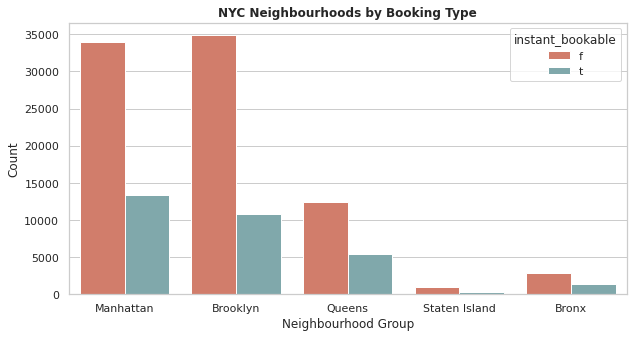

In [137]:
ax = sns.countplot(df_listings['neighbourhood_group_cleansed'], hue=df_listings.instant_bookable, palette=['#E2725A',"#79AEB2"])
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title('NYC Neighbourhoods by Booking Type',fontweight="bold")
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Count');

Text(0.5, 1.0, 'NYC Neighbourhoods')

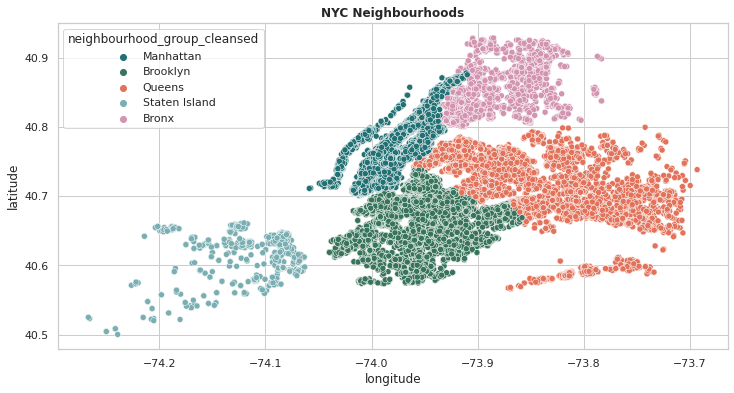

In [143]:
plt.figure(figsize=(12,6))
sns.scatterplot(df_listings.longitude,df_listings.latitude,hue=df_listings.neighbourhood_group_cleansed, 
                palette=['#217074','#37745B','#E2725A',"#79AEB2", '#D294AF'])
plt.ioff()
plt.title('NYC Neighbourhoods',fontweight="bold")


Text(0.5, 1.0, 'NYC Neighbourhoods by Host Type')

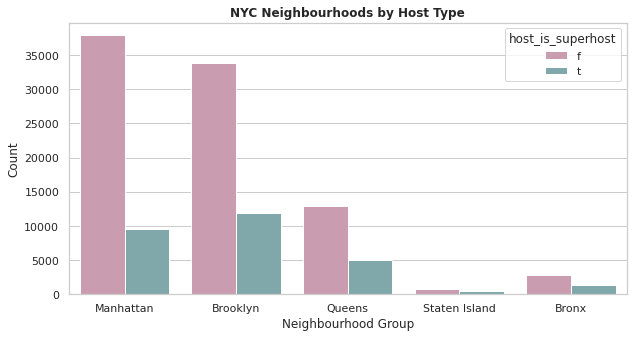

In [136]:
ax = sns.countplot(df_listings['neighbourhood_group_cleansed'], hue=df_listings.host_is_superhost, palette=['#D294AF',"#79AEB2"])
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Count');
plt.title('NYC Neighbourhoods by Host Type',fontweight="bold")

Text(0.5, 1.0, 'NYC Neighbourhoods by Host Type')

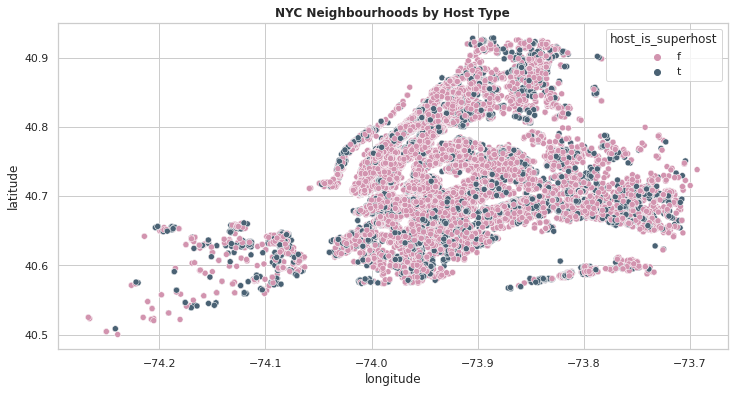

In [144]:
plt.figure(figsize=(12,6))
sns.scatterplot(df_listings.longitude,df_listings.latitude,hue=df_listings.host_is_superhost, palette=['#D294AF',"#4A6274"])
plt.ioff()
plt.title('NYC Neighbourhoods by Host Type',fontweight="bold")


In [ ]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153199 entries, 0 to 38276
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            153199 non-null  int64  
 1   host_is_superhost             152983 non-null  object 
 2   neighbourhood_cleansed        153199 non-null  object 
 3   neighbourhood_group_cleansed  153199 non-null  object 
 4   latitude                      153199 non-null  float64
 5   longitude                     153199 non-null  float64
 6   price                         153199 non-null  float64
 7   review_scores_rating          118410 non-null  float64
 8   review_scores_accuracy        116347 non-null  float64
 9   review_scores_cleanliness     116388 non-null  float64
 10  review_scores_checkin         116327 non-null  float64
 11  review_scores_communication   116365 non-null  float64
 12  review_scores_location        116315 non-null

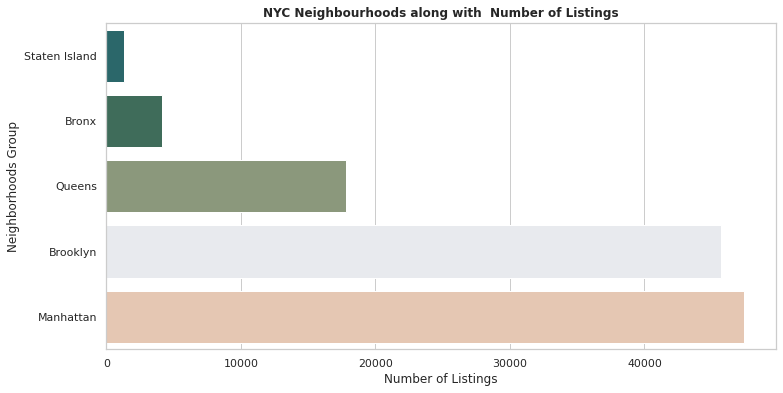

In [128]:
# Which neighborhood has the highest number of listings?
f, ax = plt.subplots(figsize=(12, 6))
sns.barplot(y = df_listings['neighbourhood_group_cleansed'].value_counts().sort_values(ascending=True).keys(),
        x = df_listings['neighbourhood_group_cleansed'].value_counts().sort_values(ascending=True).values, orient='h', palette=['#217074','#37745B','#8B9D77','#E7EAEF','#EDC5AB']);
plt.title('NYC Neighbourhoods along with  Number of Listings',fontweight="bold")
ax.set_xlabel('Number of Listings')
ax.set_ylabel('Neighborhoods Group');


In [74]:
# Getting average price per neighborhood
price_per_neighb = df_listings.groupby(['neighbourhood_group_cleansed'])['price'].mean()
price_per_neighb = price_per_neighb.reset_index()

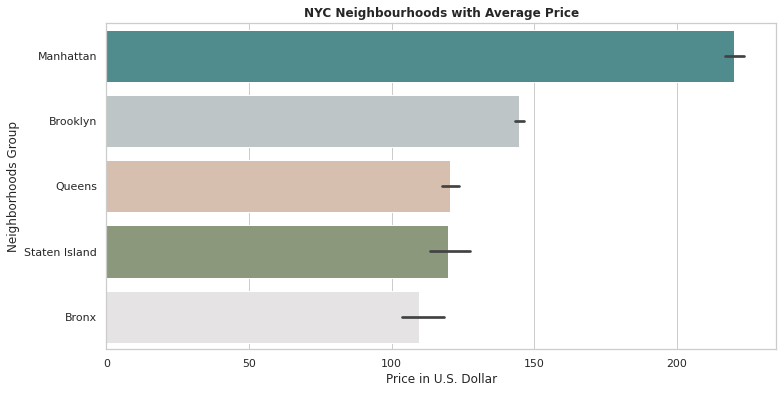

In [127]:
# Neighborhoods with their average price 
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(y = df_listings['neighbourhood_group_cleansed'], x = df_listings['price'], data = price_per_neighb, orient='h', palette=['#469597','#BBC6C8','#DDBEAA','#8B9D77','#E5E3E4'])
plt.title('NYC Neighbourhoods with Average Price',fontweight="bold")
ax.set_xlabel('Price in U.S. Dollar')
ax.set_ylabel('Neighborhoods Group');

In [97]:
df_listings.columns

Index(['id', 'host_is_superhost', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude', 'price',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable'],
      dtype='object')

In [98]:
df_listings.dropna(subset=[ 'review_scores_rating',
                           'review_scores_accuracy',
                           'review_scores_cleanliness', 
                           'review_scores_checkin',
                           'review_scores_communication', 
                           'review_scores_location',
                           'review_scores_value'],
                            how="any", inplace=True)
                           

In [99]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116309 entries, 0 to 38247
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            116309 non-null  int64  
 1   host_is_superhost             116194 non-null  object 
 2   neighbourhood_cleansed        116309 non-null  object 
 3   neighbourhood_group_cleansed  116309 non-null  object 
 4   latitude                      116309 non-null  float64
 5   longitude                     116309 non-null  float64
 6   price                         116309 non-null  float64
 7   review_scores_rating          116309 non-null  float64
 8   review_scores_accuracy        116309 non-null  float64
 9   review_scores_cleanliness     116309 non-null  float64
 10  review_scores_checkin         116309 non-null  float64
 11  review_scores_communication   116309 non-null  float64
 12  review_scores_location        116309 non-null

In [100]:
df_listings

,id,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,2595,f,Midtown,Manhattan,40.753560,-73.985590,150.0,4.70,4.72,4.62,4.76,4.79,4.86,4.41,f
1,5121,f,Bedford-Stuyvesant,Brooklyn,40.685350,-73.955120,60.0,4.52,4.22,4.09,4.91,4.91,4.47,4.52,f
2,5136,f,Sunset Park,Brooklyn,40.662650,-73.994540,275.0,5.00,5.00,5.00,5.00,5.00,4.50,5.00,f
3,5178,f,Midtown,Manhattan,40.764570,-73.983170,68.0,4.22,4.22,3.74,4.67,4.43,4.87,4.37,f
4,5203,f,Upper West Side,Manhattan,40.803800,-73.967510,75.0,4.91,4.83,4.82,4.97,4.95,4.94,4.92,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38021,53572597,f,Astoria,Queens,40.766867,-73.924403,89.0,5.00,5.00,5.00,5.00,5.00,3.00,1.00,t
38153,53609786,f,Williamsburg,Brooklyn,40.710918,-73.959553,1980.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,f
38164,53612732,t,Bedford-Stuyvesant,Brooklyn,40.678150,-73.910910,64.0,1.00,1.00,1.00,1.00,5.00,5.00,2.00,t
38168,53614162,t,East Flatbush,Brooklyn,40.660757,-73.929937,84.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,f


In [102]:
df_reviews.isnull().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         6
dtype: int64

In [103]:
df_reviews.dropna(subset =['comments'],how='any',axis=0,inplace=True)

In [104]:
! pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 4.5 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993241 sha256=556fd592151c9517cc54c75989c46b64fcf12427cf88428c53d32773aae7e491
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
# Language detect
from langdetect import detect

In [ ]:
def detect_lang(x):
    try:
        lang = detect(x)
    except:
        lang = 'other'
    return lang

df_reviews['language'] = df_reviews['comments'].apply(detect_lang)

In [ ]:
df_reviews

,listing_id,date,reviewer_id,comments,language
0,2595,2009-11-21,50679,"Notre séjour de trois nuits.\r<br/>Nous avons apprécier L'appartement qui est très bien situé. Agréable, propre et bien soigné. C'est idéal pour une famille de 3 ou 4 personnes.\r<br/>Petits soucis en arrivant il y avait personne pour nous recevoir, et il manquait le savon pour la douche, le liquide vaisselle, nous les avons reçu de surlendemain. Il y a aussi le bruit du Métro de NY, donc une première nuit difficile si on est pas habitué. Jennifer est correcte le remboursement de la caution était très rapide. A part ces petits détails notre court séjour c'est bien passé. \r<br/>Si j'ai la possibilité de revenir sur NY pour les vacances, je reprendrai à ""The Midtown Castle""\r<br/>Jean\r<br/>Possession - Ile de La Réunion\r<br/>",fr
1,2595,2009-12-05,53267,Great experience.,ro
2,2595,2009-12-10,38960,"I've stayed with my friend at the Midtown Castle for six days and it was a lovely place to be. A big spacious room with a pointy roof, which really makes you feel like staying in a castle. The location is perfect. It is just a few steps from Macy's Time Square and Theatre District. Everything worked just perfect with the keys etc. Thank you so much Jennifer, we had a great time in New York.\r<br/>Attention: it's on the 4th floor without a lift :-) but definetely worth it!",en
3,2595,2010-04-09,71130,"We've been staying here for about 9 nights, enjoying to be in the center of the city, that never sleeps...short ways to everywhere in Manhattan, by subway or by walk. Midtown castle is a beauftiful and tastful place, Jennifer and Tori relaxed and friendly hosts - thats why we - the three Berliners - recommand that place! Good to have WiFi and a little kitchen too!",en
4,2595,2010-05-25,117113,We had a wonderful stay at Jennifer's charming apartment! They were very organized and helpful; I would definitely recommend staying at the Midtown Castle!,en
...,...,...,...,...,...
19995,72265,2017-06-16,109542482,Vanessa was very pleasant and communication was very good.,en
19996,72265,2017-06-24,1282541,Great location! Close to G train.,en
19997,72265,2018-04-11,8936723,"Highly recommend. Cannot beat this value. <br/><br/>Great location - 4 minute walk to subway and 20 sec to bus which connects you easily and quickly to various parts of Manhattan and Brooklyn. Organic (as well as regular) grocery stores and lots of awesome restaurants and stores near by. Very safe neighborhoods <br/>Nice room - not big but it's plenty enough and everything works well. It's nice & warm in the winter. Even though the bedroom is separated by a curtain to the kitchen, because the host is mainly in the other section of the apartment, you have a lot of privacy. <br/>Vanessa is a very friendly, interesting and helpful host.",en
19998,72265,2018-06-15,17160406,"Vanessa is a great and very polite host and gives you as much privacy as you want. The room can be seen in the photos and has everything you need. The location is amazing as well with plenty of bars, restaurants and stores around and literally half a block away from G train.",en


In [ ]:
df_reviews.language.value_counts()

en       71641
fr        3050
es        2076
de        1009
it         498
pt         313
nl         255
zh-cn      150
ja         140
ko         108
other       90
sv          82
ru          80
ro          79
af          49
da          47
no          47
so          40
ca          32
zh-tw       29
tl          25
pl          25
fi          21
cs          20
cy          19
id          16
hu          11
sw          10
tr           8
he           6
el           5
hr           4
th           3
bg           2
sl           2
et           1
vi           1
Name: language, dtype: int64

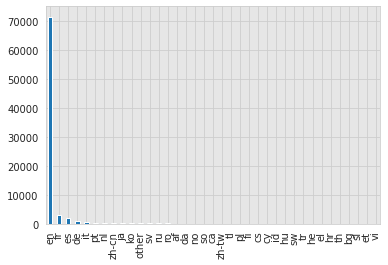

In [ ]:
df_reviews['language'].value_counts().plot.bar();


In [ ]:
df_reviews.loc[df_reviews['language']=='fr']

,listing_id,date,reviewer_id,comments,language
0,2595,2009-11-21,50679,"Notre séjour de trois nuits.\r<br/>Nous avons apprécier L'appartement qui est très bien situé. Agréable, propre et bien soigné. C'est idéal pour une famille de 3 ou 4 personnes.\r<br/>Petits soucis en arrivant il y avait personne pour nous recevoir, et il manquait le savon pour la douche, le liquide vaisselle, nous les avons reçu de surlendemain. Il y a aussi le bruit du Métro de NY, donc une première nuit difficile si on est pas habitué. Jennifer est correcte le remboursement de la caution était très rapide. A part ces petits détails notre court séjour c'est bien passé. \r<br/>Si j'ai la possibilité de revenir sur NY pour les vacances, je reprendrai à ""The Midtown Castle""\r<br/>Jean\r<br/>Possession - Ile de La Réunion\r<br/>",fr
123,5178,2010-08-18,118953,"chambre tres bien située, du bruit mais c'est normal on est en plein Manhatan. Le propriétaire est tres discret je vous le recommande tres bonne adresse",fr
149,5178,2011-03-08,311594,"Première fois à New York et très bon séjour ! L'appartement de Shun est vraiment bien situé, à proximité de tout et la chambre est plutôt grande et confonrtable. De plus le métro est à côté donc c'est également très pratique pour aller dans les lieux à visiter qui n'étaient pas proche. Times Square et Central park à côté ! Et enfin Shun est vraiment très gentil et discret. Il était là si nous avions des questions. Encore merci à lui pour ce très bon séjour, nous recommandons cet hébergement, si nous devons retourner à New York nous choisirons encore son appartement !",fr
200,5178,2012-04-16,1337014,"Nous avons séjourné une semaine chez Shun. Grande chambre très propre et bien équipée (frigo, micro-onde, bureau, ordinateur et wifi, étagère, grand placard...).\r<br/>Shun a été très attentif à ce que nous manquions de rien tout en étant très discret. Nous l'avons très peu vu car nous rentrions souvent tard. Nous recommandons cette chambre.",fr
229,5178,2013-01-19,3768630,"La chambre était confortable bien que dépouillé de toutes décorations, surtout l'emplacement est idéal, proche des stations de métro et de broadway. \r<br/>Shun est un hote discret mais disponible",fr
...,...,...,...,...,...
19661,68974,2017-12-19,28711110,Super appartement dans un quartier animé et central. La décoration est sympa. La cuisine très bien équipée. Salon cosy. Bien chauffé en hiver. Très recommandable.,fr
19675,68974,2018-09-02,190923463,"Nous avons adoré ce loft! Nous étions une famille de 5 et c’était idéal pour notre séjour de 6 jours, bien situé pour explorer à pied le sud de Manhattan (puis en métro depuis Grand Street a 2 pas du loft, pour le centre et nord). L’appart est tres propre, bien aménagé et organisé, très bien climatisé, confortable et très spacieux! Exercices cardio gratuits en prime pour monter 4 ( dernier) étages tous les jours ( pour nous ce n’était pas un problème mais il faut le savoir). De très beaux livres et une deco design avec certains meubles vintage, exactement comme sur les photo. Vue sur l’avenue et la one world tower en arrière plan. Machine à laver et sèche linge neufs, parfait avec une famille. Le bâtiment en brique rouge, typique NYC, est relativement calme, le salon donne sur l’avenue mais étant au quatrième étage, c’est tout à fait acceptable. Nous avons été accueilli par l’housekeeper d’Alicia mais Alicia réagit très rapidement par messages, elle communique aussi par téléphone si nécessaire. Elle nous a donné de bonnes adresses ‘take away’ pour dîner à l’appart, et s’est montré très flexible pour l’horaire de départ. <br/>Je recommande vivement ce loft!",fr
19823,71248,2018-08-12,17152030,"Bel appartement, clair, bien placé, conforme aux photos même si la propreté laissait un peu à désirer (ménage fait de manière superficielle et rideau de douche très sale)...<br/>Bien pour 2 adultes et un enfant (matelas futon dans la pièce commune). <br/>La climatisation un peu bruyante, mais très utile! <br/>De bonne

In [ ]:
df_reviews.loc[df_reviews['language']=='sl']

,listing_id,date,reviewer_id,comments,language
6458,105790,2014-11-24,10169217,"Privet vsem! Ya po russki. Arman ochen' gostepriimniy, obchitel'niy chozyain. Raspologenye kvartiri horoshee, Komnata super. Eche poedu obyazatel'no ostanovlus' u Armana.\r<br/>",sl
13841,56859,2017-05-14,116271063,"Skvělá lokalita+bezpecna, blizkost obchodu, metro do centra 5 min., dobra komunikace s hostitelem, koupelna sdilena s hostitelem primerene cista, pokoj studenejsi s hlukem z ulice. (Spatne uzavreni okna)",sl


In [ ]:
df_reviews.loc[df_reviews['language']=='et']

,listing_id,date,reviewer_id,comments,language
4276,94783,2019-06-21,96347368,Good value,et


In [ ]:
df_reviews.loc[df_reviews['language']=='pl']

,listing_id,date,reviewer_id,comments,language
1129,6990,2009-10-31,7691,nice,pl
7910,27644,2014-06-27,15813035,"Emma była bardzo miły gospodarz. Spędziliśmy wspaniały czas w Nowym Jorku.Apartament znajduje się w bardzo wygodnym miejscu. W pobliżu stacji metra. Jest duży, czysty i dobrze wyposażone, ale meble są dość stare.\r<br/>Krzysztof",pl
11590,45542,2018-09-11,214030038,nice guy nice place,pl
11848,45556,2019-11-29,131269496,Very nice!,pl
12450,53469,2013-08-15,7462716,"Bezpieczna, spokojna i cicha okolica. Sprawna komunikacja z kartą MTA autobus i metro. Wygodna łazienka i ogarnięta otwarta kuchnia. Gospodarz bardzo pomocny i otwarty.",pl
19235,74680,2014-06-19,9845175,Super miejsce. Gorąco polecam,pl
1134,45542,2018-09-11,214030038,nice guy nice place,pl
1730,45556,2019-11-29,131269496,Very nice!,pl
3495,89621,2017-09-17,143337753,Was nice,pl
3496,89621,2017-09-21,150733803,"Pokój bardzo czysty i przyjemny. Właściciele bardzo mili, nie było problemu z moim późniejszym przyjazdem. Lokalizacja bardzo wygodna, blisko do komunikacji miejskiej. Jak najbardziej mogę polecić to miejsce :)",pl


In [ ]:
df_reviews = df_reviews.loc[(df_reviews['language'] == 'en')] 

In [ ]:
df_reviews.language.value_counts()

en    71641
Name: language, dtype: int64

In [ ]:
def clean_text(text):
    '''
    input- 'text' to be preprocessed
    output- converts input 'text' to lowercase,remove square brackets,links,punctuation 
    and words containing numbers. Removes common accent characters and returns clean text. 
    '''
    text = text.lower()
    text = re.sub('<br\s?\/>|<br>',"", text)
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text) # removes punctuations
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) 
    return text

In [ ]:
df_reviews['comments'] = df_reviews['comments'].apply(lambda x: clean_text(x))
df_reviews.head()

,listing_id,date,reviewer_id,comments,language
2,2595,2009-12-10,38960,i ve stayed with my friend at the midtown castle for six days and it was a lovely place to be a big spacious room with a pointy roof which really makes you feel like staying in a castle the location is perfect it is just a few steps from macy s time square and theatre district everything worked just perfect with the keys etc thank you so much jennifer we had a great time in new york attention it s on the floor without a lift but definetely worth it,en
3,2595,2010-04-09,71130,we ve been staying here for about nights enjoying to be in the center of the city that never sleeps short ways to everywhere in manhattan by subway or by walk midtown castle is a beauftiful and tastful place jennifer and tori relaxed and friendly hosts thats why we the three berliners recommand that place good to have wifi and a little kitchen too,en
4,2595,2010-05-25,117113,we had a wonderful stay at jennifer s charming apartment they were very organized and helpful i would definitely recommend staying at the midtown castle,en
5,2595,2012-05-07,1783688,hi to everyone would say our greatest compliments to jennifer the host of midtown castle we spent in this lovely apartment in the heart of manhattan one month april and will remember this time as ours best the apartment is pretty spacious and great located the th ave right around the corner there is everything you can need during your short or long stay jennifer is very friendly vigorous and very responsible host thanks her and highly recomend this apartment for everyone who are looking for a quiet place right in the center of the boiling midtown,en
6,2595,2012-05-17,1870771,jennifer was very friendly and helpful and her place is exactly as advertised the location is very convenient and it was a pleasure to stay at the midtown castle i definitely recommend it thanks,en


In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
df_reviews['comments'] = df_reviews['comments'].apply(lambda x: remove_emoji(x))

In [ ]:
df_reviews.reset_index(inplace=True, drop=True)

In [ ]:
df_reviews['text_length'] = df_reviews['comments'].apply(lambda x : len(x))
df_reviews.head(4)

,listing_id,date,reviewer_id,comments,language,text_length
0,2595,2009-12-10,38960,i ve stayed with my friend at the midtown castle for six days and it was a lovely place to be a big spacious room with a pointy roof which really makes you feel like staying in a castle the location is perfect it is just a few steps from macy s time square and theatre district everything worked just perfect with the keys etc thank you so much jennifer we had a great time in new york attention it s on the floor without a lift but definetely worth it,en,468
1,2595,2010-04-09,71130,we ve been staying here for about nights enjoying to be in the center of the city that never sleeps short ways to everywhere in manhattan by subway or by walk midtown castle is a beauftiful and tastful place jennifer and tori relaxed and friendly hosts thats why we the three berliners recommand that place good to have wifi and a little kitchen too,en,366
2,2595,2010-05-25,117113,we had a wonderful stay at jennifer s charming apartment they were very organized and helpful i would definitely recommend staying at the midtown castle,en,155
3,2595,2012-05-07,1783688,hi to everyone would say our greatest compliments to jennifer the host of midtown castle we spent in this lovely apartment in the heart of manhattan one month april and will remember this time as ours best the apartment is pretty spacious and great located the th ave right around the corner there is everything you can need during your short or long stay jennifer is very friendly vigorous and very responsible host thanks her and highly recomend this apartment for everyone who are looking for a quiet place right in the center of the boiling midtown,en,570


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
#df_reviews

In [ ]:
df_reviews.head()

,listing_id,date,reviewer_id,comments,language,text_length
0,2595,2009-12-10,38960,i ve stayed with my friend at the midtown castle for six days and it was a lovely place to be a big spacious room with a pointy roof which really makes you feel like staying in a castle the location is perfect it is just a few steps from macy s time square and theatre district everything worked just perfect with the keys etc thank you so much jennifer we had a great time in new york attention it s on the floor without a lift but definetely worth it,en,468
1,2595,2010-04-09,71130,we ve been staying here for about nights enjoying to be in the center of the city that never sleeps short ways to everywhere in manhattan by subway or by walk midtown castle is a beauftiful and tastful place jennifer and tori relaxed and friendly hosts thats why we the three berliners recommand that place good to have wifi and a little kitchen too,en,366
2,2595,2010-05-25,117113,we had a wonderful stay at jennifer s charming apartment they were very organized and helpful i would definitely recommend staying at the midtown castle,en,155
3,2595,2012-05-07,1783688,hi to everyone would say our greatest compliments to jennifer the host of midtown castle we spent in this lovely apartment in the heart of manhattan one month april and will remember this time as ours best the apartment is pretty spacious and great located the th ave right around the corner there is everything you can need during your short or long stay jennifer is very friendly vigorous and very responsible host thanks her and highly recomend this apartment for everyone who are looking for a quiet place right in the center of the boiling midtown,en,570
4,2595,2012-05-17,1870771,jennifer was very friendly and helpful and her place is exactly as advertised the location is very convenient and it was a pleasure to stay at the midtown castle i definitely recommend it thanks,en,204


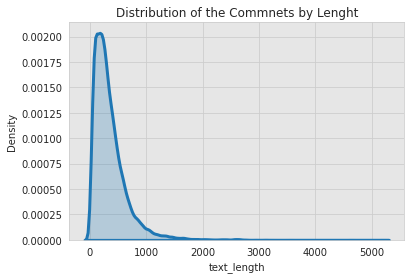

In [ ]:
# Plot distribution of the Comment Lenghth
sns.distplot(df_reviews['text_length'],hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}).set(title='Distribution of the Commnets by Lenght')
plt.show();

In [ ]:
df_reviews.shape

(77154, 5)

In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77154 entries, 0 to 77153
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   77154 non-null  int64 
 1   reviewer_id  77154 non-null  int64 
 2   comments     77154 non-null  object
 3   language     77154 non-null  object
 4   text_length  77154 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.9+ MB


In [ ]:
df_reviews

,listing_id,date,reviewer_id,comments,language,text_length
0,2595,2009-12-10,38960,i ve stayed with my friend at the midtown castle for six days and it was a lovely place to be a big spacious room with a pointy roof which really makes you feel like staying in a castle the location is perfect it is just a few steps from macy s time square and theatre district everything worked just perfect with the keys etc thank you so much jennifer we had a great time in new york attention it s on the floor without a lift but definetely worth it,en,468
1,2595,2010-04-09,71130,we ve been staying here for about nights enjoying to be in the center of the city that never sleeps short ways to everywhere in manhattan by subway or by walk midtown castle is a beauftiful and tastful place jennifer and tori relaxed and friendly hosts thats why we the three berliners recommand that place good to have wifi and a little kitchen too,en,366
2,2595,2010-05-25,117113,we had a wonderful stay at jennifer s charming apartment they were very organized and helpful i would definitely recommend staying at the midtown castle,en,155
3,2595,2012-05-07,1783688,hi to everyone would say our greatest compliments to jennifer the host of midtown castle we spent in this lovely apartment in the heart of manhattan one month april and will remember this time as ours best the apartment is pretty spacious and great located the th ave right around the corner there is everything you can need during your short or long stay jennifer is very friendly vigorous and very responsible host thanks her and highly recomend this apartment for everyone who are looking for a quiet place right in the center of the boiling midtown,en,570
4,2595,2012-05-17,1870771,jennifer was very friendly and helpful and her place is exactly as advertised the location is very convenient and it was a pleasure to stay at the midtown castle i definitely recommend it thanks,en,204
...,...,...,...,...,...,...
71636,72265,2017-06-16,109542482,vanessa was very pleasant and communication was very good,en,58
71637,72265,2017-06-24,1282541,great location close to g train,en,34
71638,72265,2018-04-11,8936723,highly recommend cannot beat this value great location minute walk to subway and sec to bus which connects you easily and quickly to various parts of manhattan and brooklyn organic as well as regular grocery stores and lots of awesome restaurants and stores near by very safe neighborhoods nice room not big but it s plenty enough and everything works well it s nice warm in the winter even though the bedroom is separated by a curtain to the kitchen because the host is mainly in the other section of the apartment you have a lot of privacy vanessa is a very friendly interesting and helpful host,en,626
71639,72265,2018-06-15,17160406,vanessa is a great and very polite host and gives you as much privacy as you want the room can be seen in the photos and has everything you need the location is amazing as well with plenty of bars restaurants and stores around and literally half a block away from g train,en,275


In [ ]:
# Tfidfvectorizer computes word counts, idf and tf-idf values all at once
 
# compute IDF values (Inverse Document Frequency), weight assigned to each word depending on how commonly used
vectorizer = TfidfVectorizer(min_df=53, max_features=50, stop_words='english', ngram_range=(1,2), use_idf=True)
matrix = vectorizer.fit_transform(df_reviews['comments'])


In [ ]:
# see first vector, IDF values for first comment

pd.DataFrame(matrix[0].T.todense(), index=vectorizer.get_feature_names(), 
             columns=["tfidf"]).sort_values(['tfidf'], ascending=False).style.bar(subset=['tfidf'], color=['#5fba7d'])

,tfidf
just,0.438475
perfect,0.408413
time,0.399522
lovely,0.248040
new york,0.245357
york,0.245336
staying,0.237157
like,0.236849
new,0.231470
really,0.203986


In [ ]:
df_reviews['comments'][27]

'the midtown castle is a beautiful place to stay in the center of the city   truly a sanctuary with everything you need  little touches of nature and beauty throughout  waking up with the sun from the skylight was amazing  '

### Estimate polarity

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
# test it out on first comment

def sentiment_analyzer_scores(comment):
    score = analyzer.polarity_scores(comment)
    return(pd.DataFrame.from_dict(score, orient='index'))

sentiment_analyzer_scores(df_reviews['comments'][27])

,0
neg,0.0000
neu,0.6960
pos,0.3040
compound,0.9371


In [ ]:
# we want one overall polarity score, so just look at the 'compound' score

compound_polarity= lambda s: (analyzer.polarity_scores(s))['compound']

In [ ]:
df_reviews['polarity'] = df_reviews.comments.map(compound_polarity)

In [ ]:
df_reviews[:5].style.bar(subset=['polarity'], align='mid', color=['#d65f5f', '#5fba7d'])

,listing_id,date,reviewer_id,comments,language,text_length,polarity
0,2595,2009-12-10,38960,i ve stayed with my friend at the midtown castle for six days and it was a lovely place to be a big spacious room with a pointy roof which really makes you feel like staying in a castle the location is perfect it is just a few steps from macy s time square and theatre district everything worked just perfect with the keys etc thank you so much jennifer we had a great time in new york attention it s on the floor without a lift but definetely worth it,en,468,0.927400
1,2595,2010-04-09,71130,we ve been staying here for about nights enjoying to be in the center of the city that never sleeps short ways to everywhere in manhattan by subway or by walk midtown castle is a beauftiful and tastful place jennifer and tori relaxed and friendly hosts thats why we the three berliners recommand that place good to have wifi and a little kitchen too,en,366,0.913600
2,2595,2010-05-25,117113,we had a wonderful stay at jennifer s charming apartment they were very organized and helpful i would definitely recommend staying at the midtown castle,en,155,0.940900
3,2595,2012-05-07,1783688,hi to everyone would say our greatest compliments to jennifer the host of midtown castle we spent in this lovely apartment in the heart of manhattan one month april and will remember this time as ours best the apartment is pretty spacious and great located the th ave right around the corner there is everything you can need during your short or long stay jennifer is very friendly vigorous and very responsible host thanks her and highly recomend this apartment for everyone who are looking for a quiet place right in the center of the boiling midtown,en,570,0.986300
4,2595,2012-05-17,1870771,jennifer was very friendly and helpful and her place is exactly as advertised the location is very convenient and it was a pleasure to stay at the midtown castle i definitely recommend it thanks,en,204,0.954200


In [ ]:
df_reviews[df_reviews['polarity']<0][:5].style.bar(subset=['polarity'], align='mid', color=['#d65f5f', '#5fba7d'])

,listing_id,date,reviewer_id,comments,language,text_length,polarity
21,2595,2017-12-03,2888785,this is a nice apartment and it looks like in the photo it is well located and jennifer was very nice and super responsive she also let me have a late check out at no extra cost which was very kind of her stars for that on the negative side it was rather cold in the room i stayed there for nights end of november beginning of december so the central heating should be on but it only worked occasionally this is a building from phone number hidden by airbnb and the amenities are a bit worn and probably never have been updated there is an extra heater but it is not sufficient to heat up the room cause the ceiling is high and the glas roof is not a good insulation consequently for the majority of the time the temperature inside was between phone number hidden by airbnb c which was disagreeable second point was the noise from construction sites in the street one just opposite the building they started work early and the clearing of rubble was sometimes done past midnight and very loud once the heating problem is sorted out and the construction is done it will be a nice place to stay,en,1121,-0.445500
30,2595,2018-10-01,174975601,the location made getting to time square easily accessible apartment was quiet and no disturbances from neighbors at all,en,122,-0.296000
41,2595,2019-08-21,33952280,first of all i have to say that jennifer is not allowed to sublet her apartment by her landlord i was instructed by her to not mention airbnb to anybody beforehand which was fine but one evening i was stopped by her landlord in the hallway and questioned about where i am staying how long where jennifer is etc afterwards although i didn t say anything wrong jennifer freaked out about it and i really thought for a few hours that i would have to move out and find another place to stay right away from that point on i felt really unsafe there and always tried to hide from the landlord for my stay the apartment was also not ideal there is no couch only cushions on the floor and there is no real table and chairs i had to work from home sometimes and could not really do it anywhere the place was really clean in general only the bathroom and the shower were really not okay especially the shower curtain was mildewed the kitchen was clean and well equipped apartment has an ac which is definitely a pro also what should be mentioned the hallway is really narrow and the stairs are quite steep so with a huge suitcase not ideal as the apartment is walk up to the floor the location of the apartment is alright in my opinion it is a bit busy in that area and there are nicer places to live bit that is just my personal opinion,en,1359,-0.249500
104,5178,2010-03-14,35310,the apartment is not the place shown in the pictures it was not clean never met akiko only her friend website hidden by airbnb unfortunetly i have nothing positive to say about my stay sorry but i feel cheated,en,219,-0.726200
113,5178,2010-07-27,106633,we stayed at shun s place for a week in july his flat is extremely well located walking from times square and central park it s also very close to the metro didn t have to make any transfer in the subway during the week shun is nice very discreet privacy garanteed the bad point of being so well located is that it s very noisy even during the night the room was ok but not perfectly clean dirty dishes earings in the sheets dust we do still recommand this place because of the price and also of the location,en,537,-0.491100


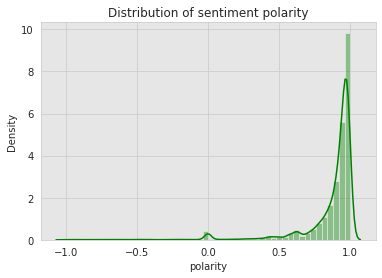

In [ ]:
sns.distplot(df_reviews['polarity'], norm_hist=True, color='g')
plt.title('Distribution of sentiment polarity');

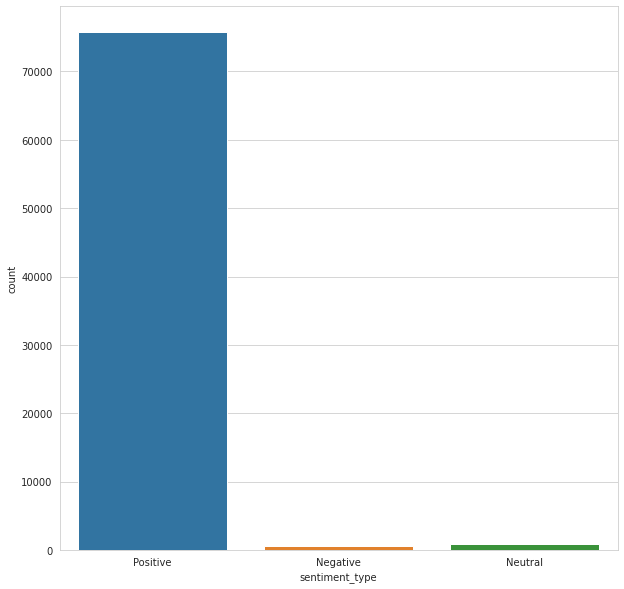

In [ ]:
def f(df_reviews):
    if df_reviews['polarity'] > 0:
        val = "Positive"
    elif df_reviews['polarity'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_reviews['sentiment_type'] = df_reviews.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="sentiment_type", data=df_reviews)

In [ ]:
df_reviews[df_reviews['sentiment_type']=='Neutral'][:10].style.bar(subset=['polarity'],align='mid', color=['#d65f5f', '#5fba7d'])

,listing_id,reviewer_id,comments,language,text_length,polarity,sentiment_type
223,4952,4130118,the host provided a key to the property and upon arrival provided for a tour of the property the host often met us at the door as we returned for the evening,en,160,0.000000,Neutral
252,4952,110497961,convenient place for visiting stanford,en,38,0.000000,Neutral
331,2894634,12141334,vic is a very attentive host,en,28,0.000000,Neutral
533,21373,2184084,this is a spectacular place with spectacular people,en,53,0.000000,Neutral
573,1364787,136847697,it was indeed a cozy room,en,25,0.000000,Neutral
601,21373,15627492,the reservation was canceled days before arrival this is an automated posting,en,81,0.000000,Neutral
666,21373,6148628,the host canceled this reservation days before arrival this is an automated posting,en,87,0.000000,Neutral
670,3104528,8751897,the reservation was canceled days before arrival this is an automated posting,en,81,0.000000,Neutral
693,21373,74106708,the host canceled this reservation days before arrival this is an automated posting,en,87,0.000000,Neutral
793,21373,186496708,incredible place with incredible people,en,41,0.000000,Neutral


In [ ]:
df_reviews['comments'].str.match('the host canceled this reservation days before arrival this is an automated posting	').sum()

0

In [ ]:
#discard = ["is an automated posting"]
#df_reviews = df_reviews[df_reviews['comments'].str.contains('|'.join(discard))]

In [ ]:
df_reviews[df_reviews['sentiment_type']=='Neutral'][:15].style.bar(subset=['polarity'], align='mid', color=['#d65f5f', '#5fba7d'])

,listing_id,reviewer_id,comments,language,text_length,polarity,sentiment_type
223,4952,4130118,the host provided a key to the property and upon arrival provided for a tour of the property the host often met us at the door as we returned for the evening,en,160,0.000000,Neutral
252,4952,110497961,convenient place for visiting stanford,en,38,0.000000,Neutral
331,2894634,12141334,vic is a very attentive host,en,28,0.000000,Neutral
533,21373,2184084,this is a spectacular place with spectacular people,en,53,0.000000,Neutral
573,1364787,136847697,it was indeed a cozy room,en,25,0.000000,Neutral
601,21373,15627492,the reservation was canceled days before arrival this is an automated posting,en,81,0.000000,Neutral
666,21373,6148628,the host canceled this reservation days before arrival this is an automated posting,en,87,0.000000,Neutral
670,3104528,8751897,the reservation was canceled days before arrival this is an automated posting,en,81,0.000000,Neutral
693,21373,74106708,the host canceled this reservation days before arrival this is an automated posting,en,87,0.000000,Neutral
793,21373,186496708,incredible place with incredible people,en,41,0.000000,Neutral


In [ ]:
df_reviews

,listing_id,reviewer_id,comments,language,text_length,polarity,sentiment_type
0,26445399,3558426,this cottage has everything you need and is centerally locates on the peninsula walking access to great restaurants in palo alto short drive or bike ride to stanford s campus,en,179,0.6249,Positive
1,26445399,8627033,enjoyed our stay very much and would stay here again,en,53,0.5106,Positive
2,26445399,75784163,great studio in the heart of menlo park close to downtown palo alto and restaurants the studio is not huge but very well arranged and contains everything we needed during our stay sandra was super helpful i can only recommend you stay at her place,en,253,0.9549,Positive
3,26445399,259305933,great location friendly community safe beautiful neighborhood very walkable property matched description i would recommend sandra and carl were also very accomodating and offered thoughtful recommendations,en,214,0.9595,Positive
4,26445399,43307267,sandra is super nice and friendly the place has almost everything we need there are restaurants and markets within walking distance i can t ask for more at this price really enjoy the stay,en,193,0.9245,Positive
...,...,...,...,...,...,...,...
77149,7753356,19358386,my husband and i enjoyed our stay with li li ensured that everything went smoothly with prompt and clear communication the unit was sparkling clean which we really appreciate big bonus delicious homemade apple pie yum thanks li,en,240,0.9725,Positive
77150,7753356,28510914,this is an amazing place to stay if you re interested in exploring the pebble beach monterey carmel area very centrally located and includes great amenities such as free access to the mi drive and guest passes to the monterey aquarium li is very kind and helpful quickly responds to all messages and is more than happy to offer tips and suggestions on what you can do while in town the suite where you will be staying is very nicely arranged and includes all the amenities you might need for a short vacation a true gem we would definitely come back,en,564,0.9865,Positive
77151,7753356,105058889,li s place is quiet and clean we arrived later in the night and even saw some friendly deer li s place is quite cozy and the bed is comfortable we took advantage of the free aquarium tickets and enjoyed our trip to monterey would definitely recommend,en,255,0.9682,Positive
77152,7753356,111435487,we had a great stay at li s place she is very sweet and also responds quickly she makes sure that we are comfortable and have everything you need the location is amazing and is so peaceful the place is small but is perfect for two people and has everything you need shower products are also provided after checking out we went to carmel beach which is only a few minutes away from li s place we thoroughly enjoyed the place and the monterey passes and would love to be back next time,en,491,0.9821,Positive


In [ ]:
pos_reviews = df_reviews[df_reviews['sentiment_type']=='Positive']

In [ ]:
neg_reviews = df_reviews[df_reviews['sentiment_type']=='Negative']

In [ ]:
pos_reviews =  ''.join(pos_reviews['comments'])

In [ ]:
neg_reviews =  ''.join(neg_reviews['comments'])

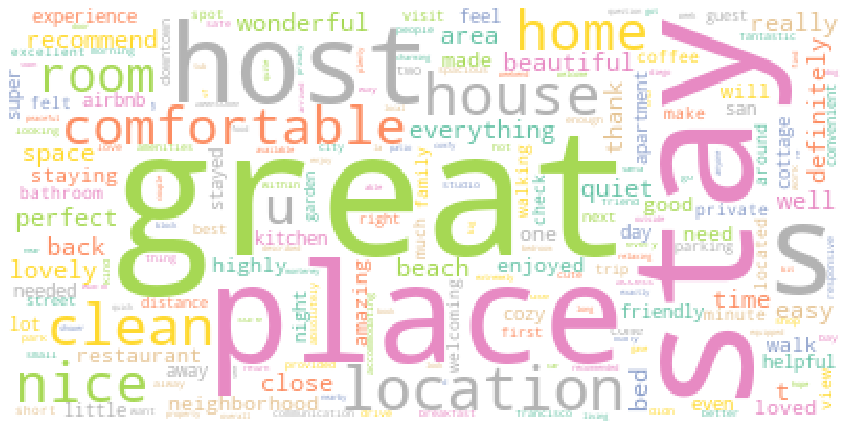

In [ ]:
from wordcloud.wordcloud import STOPWORDS
# Collocation argument is set to FALSE to ensure that the word cloud doesn’t contain any bigrams or duplicate words
pos_wordcloud = WordCloud(stopwords=set(STOPWORDS), colormap='Set2',collocations=False, mode="RGBA", background_color="white").generate(pos_reviews)

plt.figure(figsize=(15,10))
plt.axis('off')
plt.imshow(pos_wordcloud, interpolation="None")

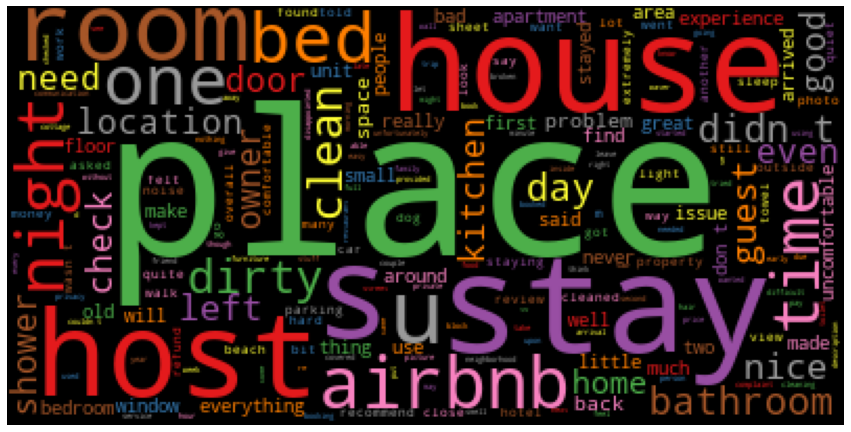

In [ ]:
neg_wordcloud = WordCloud(stopwords=set(STOPWORDS),repeat=False, colormap='Set1', background_color="black").generate(neg_reviews)

plt.figure(figsize=(15,10))
plt.axis('off')
plt.imshow(neg_wordcloud)

In [ ]:
#df_reviews.to_csv('df_reviews_polarity.csv', index=False)

In [ ]:
from nltk.util import ngrams

def ngram_convertor(df,n=3):

  def ngramconvert(df,n=3):
    for item in df.columns:
        df['new'+item]=df[item].apply(lambda sentence: list(ngrams(sentence.split(), n)))
    return df

In [ ]:
# Remove Stopwords
#df_reviews['comments'] = df_reviews.str.replace("[^\w\s]", "")
df_reviews['comments'] = df_reviews['comments'].apply(lambda words: [word for word in words if word not in stop])

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer

tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
   return [lemmatizer.lemmatize(w) for w in tokenizer.tokenize(text)]

df_reviews['comments'] = df_reviews.comments.apply(lemmatize_text)

#df_reviews = dataset.assign(col_lemma = dataset.col.apply(lambda x: lemmatize(x))

In [ ]:
df_reviews['comments'] = df_reviews['comments'].apply(str)

In [ ]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))